In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.rcParams['font.family'] = 'monospace'

In [58]:
df = pd.read_csv('./muck_plot_vals.csv', index_col='Year')
df.drop(df.columns[0], axis=1, inplace=True)
df

,control_snow_on_days,control_DZ_days,warm_snow_on_days,warm_DZ_days,DZday_change,top_den_change,control_mean_den,warm_mean_den
Year,,,,,,,,
2015.0,120.7,46.0,100.5,43.9,-2.1,73.8,291.192439,332.474313
2016.0,156.3,5.4,138.6,41.7,36.3,72.9,233.126708,283.749277
2017.0,181.1,31.3,137.6,17.0,-14.3,54.2,238.989050,264.133797
2018.0,186.9,61.4,167.5,35.0,-26.4,115.1,228.151138,321.915156
2019.0,145.3,14.5,124.6,47.5,33.0,62.5,216.285990,242.278456
2020.0,120.0,35.0,99.5,36.2,1.2,88.8,277.010413,326.082457
2021.0,152.7,60.1,125.6,31.4,-28.7,125.8,264.921905,356.706690
2022.0,114.3,32.4,64.7,13.8,-18.6,9.4,290.697909,229.728918
2023.0,176.3,31.7,145.8,54.3,22.6,118.0,268.885118,346.909808


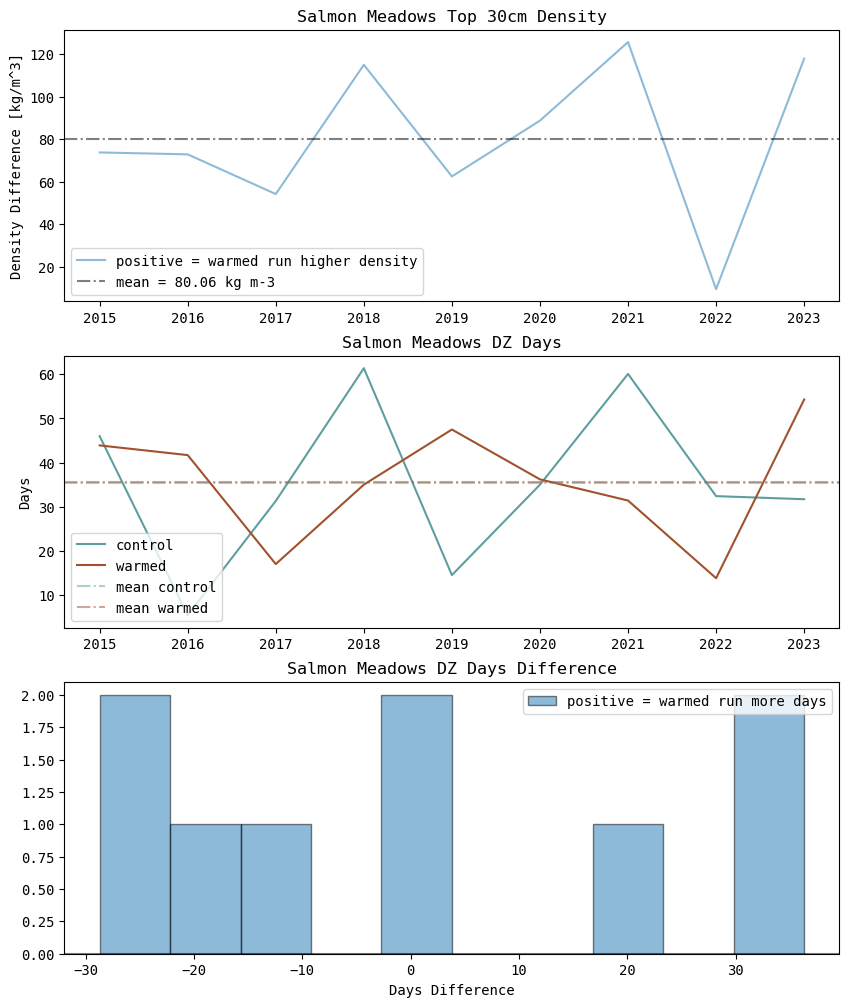

In [59]:
fig, ax = plt.subplots(3,1,figsize=(10, 12))

mean_den_change = np.nanmean(df.top_den_change)
ax[0].plot(df.top_den_change, label='positive = warmed run higher density', alpha=0.5)
ax[0].axhline(mean_den_change, color='black', alpha=0.5, label=f'mean = {mean_den_change:.2f} kg m-3', ls='-.')
ax[0].set_title('Salmon Meadows Top 30cm Density')
ax[0].set_ylabel('Density Difference [kg/m^3]')
ax[0].legend()

ax[1].plot(df.control_DZ_days, label='control', color='cadetblue')
ax[1].plot(df.warm_DZ_days, label='warmed', color='sienna')
ax[1].axhline(np.nanmean(df.control_DZ_days), color='cadetblue', alpha=0.5, label='mean control', ls='-.')
ax[1].axhline(np.nanmean(df.warm_DZ_days), color='sienna', alpha=0.5, label='mean warmed', ls='-.')
ax[1].set_title('Salmon Meadows DZ Days')
ax[1].set_ylabel('Days')
ax[1].legend()

ax[2].hist(df.DZday_change, label='positive = warmed run more days', ec='k', bins=10, alpha=0.5)
ax[2].axhline(0, color='black', alpha=0.5)
ax[2].set_title('Salmon Meadows DZ Days Difference')
ax[2].set_xlabel('Days Difference')
ax[2].legend()

# Try a t-test on danger days (control vs warm)

In [60]:
stats.ttest_ind(a=df.control_DZ_days, b=df.warm_DZ_days, equal_var=True)

TtestResult(statistic=-0.043582444085930684, pvalue=0.9657765225613194, df=16.0)

In [61]:
# Perform a wilcoxon signed-rank test (non-parametric paired t-test)
t_statistic, p_value = stats.wilcoxon(df['control_DZ_days'], df['warm_DZ_days'])
print(f"t-statistic = {t_statistic}, p-value = {p_value}")

t-statistic = 22.0, p-value = 1.0


# Try t test on density changes

In [62]:
# Perform a paired t-test
t_statistic, p_value = stats.ttest_rel(df['control_mean_den'], df['warm_mean_den'])

print(f"t-statistic = {t_statistic}, p-value = {p_value}")

t-statistic = -2.79779020157264, p-value = 0.023277004992698646


(array([1., 0., 0., 0., 0., 2., 1., 2., 1., 2.]),
 array([-60.96899105, -45.49569018, -30.02238931, -14.54908845,
          0.92421242,  16.39751328,  31.87081415,  47.34411502,
         62.81741588,  78.29071675,  93.76401761]),
 <BarContainer object of 10 artists>)

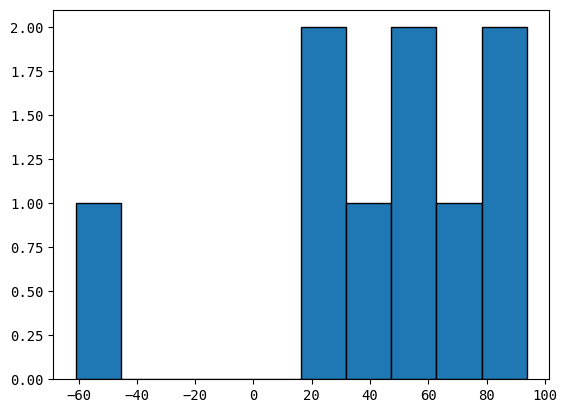

In [63]:
plt.hist(df['warm_mean_den']-df['control_mean_den'], ec='k')

In [64]:
# Perform a wilcoxon signed-rank test (non-parametric paired t-test)
t_statistic, p_value = stats.wilcoxon(df['control_mean_den'], df['warm_mean_den'])
print(f"t-statistic = {t_statistic}, p-value = {p_value}")

t-statistic = 6.0, p-value = 0.0546875
